# Signs Recognition NN

###### Created by Timofey Kruk 
* kruktimofey@gmail.com

Simple Convolutional NN for signs recognition.
GTSRB - German Traffic Sign Recognition Benchmark was used for learning and testing.

In [198]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
import csv
#For random shuffling into test and train tests
from sklearn.model_selection import train_test_split
#To create binary matrix from category vector
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

#####  Preparing data

In [184]:
data=[]
labels=[]
#There are 43 classes of signs in dataset
classes=43
current_path=os.getcwd()
dataset_path=os.path.join(current_path,"gtsrb-german-traffic-sign")

for i in range(classes):
    path=os.path.join(dataset_path,"train",str(i))
    
    images=os.listdir(path)
    
    for image_name in images:
        image=Image.open(path+'\\'+image_name)
        image=image.resize((30,30))
        image=np.array(image)
        
        data.append(image)
        labels.append(i)
        
data=np.array(data)
labels=np.array(labels)

In [192]:
#train set split
X_train,X_test,Y_train, Y_test=train_test_split(data,labels,test_size=0.2)

#Converting y into one-hot encoding
Y_train=to_categorical(Y_train.T,classes)
Y_test=to_categorical(Y_test,classes)

In [193]:
Y_train.shape

(31367, 43)

#### Buiding CNN model

In [199]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(5,5),activation="relu",input_shape=X_train.shape[1:]))

model.add(Conv2D(filters=32,kernel_size=(5,5),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dropout(rate=0.5))

#Using softmax for 
model.add(Dense(classes,activation="softmax"))
          
#Compilation of the model
model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])          

#### Training and validating the model

In [200]:
epochs=20
history=model.fit(X_train,Y_train,
                  batch_size=64,
                  epochs=epochs,
                  validation_data=(X_test,Y_test))

Train on 31367 samples, validate on 7842 samples
Epoch 1/20
31367/31367 [==============================] - 75s 2ms/step - loss: 3.1548 - accuracy: 0.2313 - val_loss: 1.8254 - val_accuracy: 0.5176
Epoch 2/20
31367/31367 [==============================] - 73s 2ms/step - loss: 1.4383 - accuracy: 0.5827 - val_loss: 0.9615 - val_accuracy: 0.7409
Epoch 3/20
31367/31367 [==============================] - 73s 2ms/step - loss: 1.0252 - accuracy: 0.6933 - val_loss: 0.4600 - val_accuracy: 0.8585
Epoch 4/20
31367/31367 [==============================] - 73s 2ms/step - loss: 0.7919 - accuracy: 0.7574 - val_loss: 0.3911 - val_accuracy: 0.8840
Epoch 5/20
31367/31367 [==============================] - 73s 2ms/step - loss: 0.5825 - accuracy: 0.8208 - val_loss: 0.1897 - val_accuracy: 0.9470
Epoch 6/20
31367/31367 [==============================] - 76s 2ms/step - loss: 0.4556 - accuracy: 0.8613 - val_loss: 0.1973 - val_accuracy: 0.9447
Epoch 7/20
31367/31367 [==============================] - 76s 2ms/ste

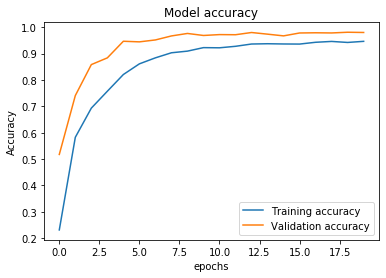

In [204]:
plt.figure(0)
plt.plot(history.history['accuracy'],label="Training accuracy")
plt.plot(history.history['val_accuracy'],label="Validation accuracy")
plt.title("Model accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend()


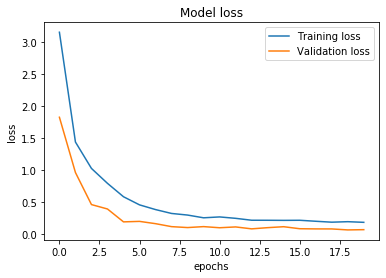

In [203]:
plt.figure(1)
plt.plot(history.history['loss'],label="Training loss")
plt.plot(history.history['val_loss'],label="Validation loss")
plt.title("Model loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

#### Testing model

In [209]:
Y_test=pd.read_csv("F:\BSU_FAMCS\SignsRecognition\gtsrb-german-traffic-sign\\Test.csv")

labels=Y_test["ClassId"].values
images=Y_test["Path"].values

data=[]

for img in images:
    image=Image.open("gtsrb-german-traffic-sign\\"+img)
    image=image.resize((30,30))
    data.append(np.array(image))
    
X_test=np.array(data)

#Predicting
prediction=model.predict_classes(X_test)

In [210]:
prediction

array([16,  1, 38, ..., 32,  7, 10], dtype=int64)

In [212]:
#Counting accuracy for our model
from sklearn.metrics import accuracy_score

score= accuracy_score(labels,prediction)
print(score)

0.946159936658749


## Accuracy score: 0,946

In [215]:
#Saving our model
model.save("SignClassifier.h5")